In [136]:
import matplotlib.pyplot as plt
import numpy as np
import texpy as mz
from src import *

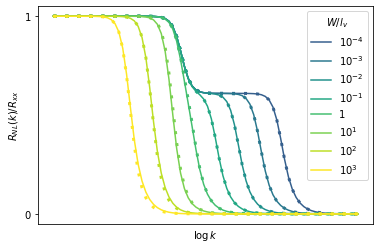

In [155]:
#@title $R_{NL}(k)$ for different widths {vertical-output:true}
#@markdown here you can change the parameters, `l_v`=$l_v$ and `tan`=$\tan(\theta_{VH})$, every time you change the values you have to re-execute the cell
number_of_graphs=8
cmap=plt.get_cmap('viridis')
colors=cmap(np.linspace(.3,1,number_of_graphs))

widths=np.logspace(-8,-1,number_of_graphs,base=10)
#mu=np.linspace(delta,2*delta,number_of_graphs)

lv = 1e-4 #@param {type:"number"}
tan=0.8 #@param {type:"number"}

theta=np.arctan(tan)
for i in range(number_of_graphs):
    k= np.logspace(-2,12,80,base=10,dtype=np.double)
    R=[R_NLk(k,widths[i],lv,tan=tan) for k in k]
    label='$10^{'+str(int(np.log10(widths[i]/lv)))+'}$'
    if widths[i]==lv:label=1
    #plt.plot(np.array([1,1])/widths[i], [0,1],color=colors[i],linestyle=(0,(1,3)),linewidth=2)
    #plt.plot(k,R,color=colors[i],label=label,linewidth=3)
    plt.plot(k,R,color=colors[i],label=label,linewidth=1.5)
    plt.plot(k,R_NLk0(k,widths[i],lv,tan=tan),linestyle=(0,(1,3)),linewidth=3,color=colors[i])



title_theta='$\\theta_{VH}$='+str(theta/np.pi)[:4]+'$\pi$'
title_lv='$l_v=$'+ str(mz.ns(lv*1e9))+'nm'

title=title_theta + ', ' + title_lv

#@markdown the continous line is the exact formula `R_NLk`, wike the dots are from the approximate `R_NLk0`
#plt.plot(np.array([1,1])/lv, [0,1],color='black',linestyle=(2,(5,5)),linewidth=2)


plt.xscale('log')
plt.xlabel('$\log k$')
plt.xticks([])
plt.yticks([0,1])
plt.ylabel('$R_{NL}(k)/R_{xx}$')
#plt.title(title)
plt.legend(title='$W/l_v$')
#plt.savefig('Latex/Immagini/rnl/widths.pdf',format='pdf')
plt.savefig('Latex/Immagini/rnl/kapproxcomp.pdf',format='pdf')
plt.show()
#plt.xlim(0,500)

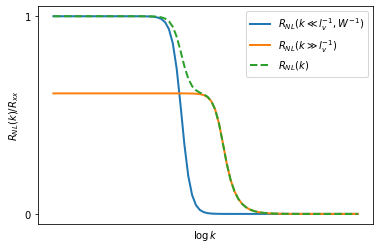

In [146]:
width=lv/20

# plt.plot(np.array([1,1])/width, [0,1],color=colors[1],linestyle=(0,(1,3)),linewidth=2)
# plt.plot(np.array([1,1])/lv, [0,1],color='black',linestyle=(2,(5,5)),linewidth=2)



k= np.logspace(-2,12,80,base=10,dtype=np.double)

c1= 1/(1+(Lv(width,lv,tan)*k)**2)
c2= 2*np.tanh(k*width/2)/(k*width*(1+tan**2))
plt.plot(k,c1,label='$R_{NL}(k\ll l_v^{-1},W^{-1})$',linewidth=2)
plt.plot(k,c2,label='$R_{NL}(k\gg l_v^{-1})$',linewidth=2)

R=[R_NLk(k,width,lv,tan=tan) for k in k]
plt.plot(k,R,linestyle='--',label='$R_{NL}(k)$',linewidth=2)



plt.xscale('log')
plt.xlabel('$\log k$')
plt.xticks([])
plt.yticks([0,1])
plt.ylabel('$R_{NL}(k)/R_{xx}$')
plt.legend()
plt.savefig('Latex/Immagini/rnl/2approx.pdf',format='pdf')
#plt.title(title)
plt.show()


In [139]:
#@title Here you can play with the numerical solution {vertical-output:true}
limit=1e4/width

x=(np.arange(70)*600)*np.pi/limit
Y=R_NLx(x,width,lv,tan,limit=limit)*width

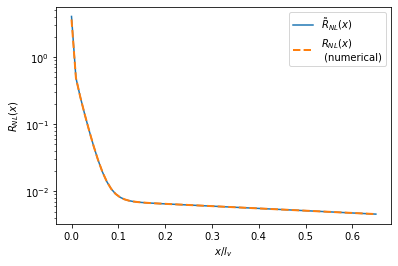

In [160]:

x[0]=1e-10
yappr=R_NL0(x,width,lv,tan) 
plt.plot(x/lv,yappr,label='$\\tilde{R}_{NL}(x)$')

# yappr=R_NL1(x,width,lv,tan)
# plt.plot(x/lv,yappr,label='$R_{NL}(x\gg l_v,W)$')
# yappr=R_NL2(x[:10],width,lv,tan)
# plt.plot(x[:10]/lv,yappr,label='$R_{NL}(x\ll l_v)$')



plt.plot(x/lv,Y,label='$R_{NL}(x)$\n (numerical)',linestyle='--',linewidth=2)


plt.yscale('log')
plt.xlabel('$x/l_v$')
plt.ylabel('$R_{NL}(x)$')

title_width='$W=$'+str(mz.ns(width*1e9))+'nm'
title=title_theta + ', ' + title_lv + ', ' + title_width

#plt.title(title)
#plt.legend(loc='right', bbox_to_anchor=(1.15,0.5), shadow=True,title='width [nm]')
#plt.xlim(0,1)
#plt.ylim(1e-3,1)
plt.legend()
#plt.savefig('Latex/Immagini/rnl/x2approx.pdf',format='pdf')
plt.savefig('Latex/Immagini/rnl/xapprox.pdf',format='pdf')


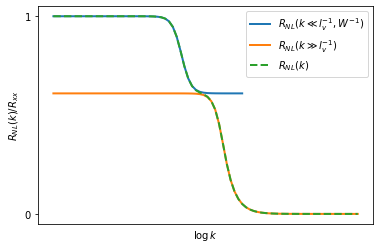

In [145]:

# plt.plot(np.array([1,1])/width, [0,1],color=colors[1],linestyle=(0,(1,3)),linewidth=2)
# plt.plot(np.array([1,1])/lv, [0,1],color='black',linestyle=(2,(5,5)),linewidth=2)



k= np.logspace(-2,12,80,base=10,dtype=np.double)

c1= 1/(1+(Lv(width,lv,tan)*k)**2)/(1+tan**(-2))+ 1/(1+tan**2)
c2= 2*np.tanh(k*width/2)/(k*width*(1+tan**2))
plt.plot(k[:50],c1[:50],label='$R_{NL}(k\ll l_v^{-1},W^{-1})$',linewidth=2)
plt.plot(k,c2,label='$R_{NL}(k\gg l_v^{-1})$',linewidth=2)

R=[R_NLk(k,width,lv,tan=tan) for k in k]
plt.plot(k,R,linestyle='--',label='$R_{NL}(k)$',linewidth=2)



plt.xscale('log')
plt.xlabel('$\log k$')
plt.xticks([])
plt.yticks([0,1])
plt.ylabel('$R_{NL}(k)/R_{xx}$')
plt.legend()
plt.savefig('Latex/Immagini/rnl/3approx.pdf',format='pdf')
#plt.title(title)
plt.show()